In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pred_results_stratified = pd.read_csv("prediction_result/bert_stratified_pred_analysis.csv")

In [8]:
pred_results_stratified['Predicted'] = pred_results_stratified['Predicted']+1
pred_results_stratified['Actual'] = pred_results_stratified['Actual']+1

In [9]:
pred_results_stratified

,Unnamed: 0,Full Review,Predicted,Actual,Highest Probability
0,0,"very fun game, good graphics and realistic dri...",5,5,0.606299
1,1,Awesome Case I really like this case. When I w...,5,5,0.485208
2,2,Great game,5,5,0.906231
3,3,I ordered this by mistake thinking that I was ...,5,5,0.909810
4,4,The game is very generic but fun my husband lo...,5,4,0.893876
...,...,...,...,...,...
165478,165478,Works perfectly.,5,5,0.958228
165479,165479,Great! Exactly as described! Perfect for my Xb...,5,5,0.979020
165480,165480,Works perfectly.,5,5,0.958228
165481,165481,Play it for the fun not the story. This is a f...,4,3,0.536065


In [10]:
wrong_preds = pred_results_stratified[pred_results_stratified['Predicted'] != pred_results_stratified['Actual']].sort_values(by='Highest Probability')

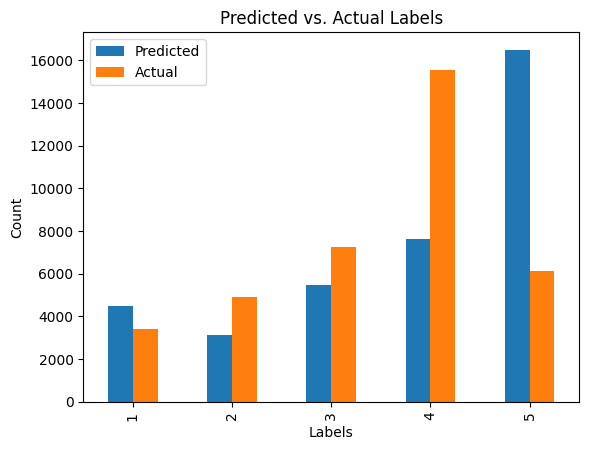

In [11]:
predicted_counts = wrong_preds['Predicted'].value_counts()
actual_counts = wrong_preds['Actual'].value_counts()

# Merge the predicted and actual counts into a single DataFrame
comparison_df = pd.DataFrame({'Predicted': predicted_counts, 'Actual': actual_counts})

# Plot the bar chart
comparison_df.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Predicted vs. Actual Labels')
plt.legend()
plt.show()

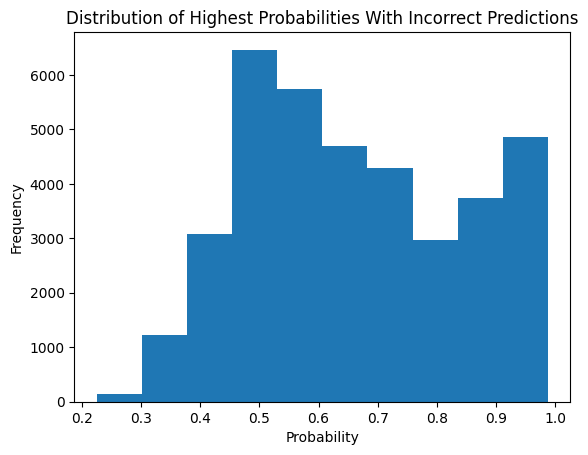

In [18]:
import matplotlib.pyplot as plt

highest_probabilities = wrong_preds['Highest Probability']

plt.hist(highest_probabilities, bins=10)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Highest Probabilities With Incorrect Predictions')
plt.show()


In [13]:
# number of incorrect prediction wher the predicted label differs from the actual label by more than 1
diff_greater_than_threshold = wrong_preds[abs(wrong_preds['Predicted'] - wrong_preds['Actual']) > 1]
len(diff_greater_than_threshold)

8377

In [14]:
# review with highest probability (confidence) but incorrectly predicted
wrong_preds[wrong_preds['Unnamed: 0'] == 21302]

,Unnamed: 0,Full Review,Predicted,Actual,Highest Probability
21302,21302,This thing sounds amazing! One of the best hea...,5,4,0.987897


In [15]:
# review with the lowest confidence and incorrectly predicted
wrong_preds[wrong_preds['Unnamed: 0'] == 125260]

,Unnamed: 0,Full Review,Predicted,Actual,Highest Probability
125260,125260,The game isn't bad for a bunch of unrelated mu...,2,3,0.225085


In [16]:
# predictions where the model was unsure (confidence between 0.45 and 0.55)
threshold = 0.5
wrong_preds[wrong_preds['Highest Probability'].between(threshold - 0.05, threshold + 0.05)]

,Unnamed: 0,Full Review,Predicted,Actual,Highest Probability
10436,10436,did not come with power cord My order was righ...,3,2,0.450022
62775,62775,This piece of technology feels a lot like that...,3,2,0.450026
122414,122414,Otherwise fine. The cord came out. had to unsc...,2,3,0.450046
140997,140997,Ridoculous Rubber I tried them out with a raci...,3,2,0.450064
19477,19477,I've played it on a friends system - and hones...,2,1,0.450067
...,...,...,...,...,...
45252,45252,"A solid product by itself, but it didn't fit ....",3,2,0.549941
132799,132799,Meh If you have gotten tired of all of your ot...,4,3,0.549947
46400,46400,good game. It came to me just when I expected ...,4,5,0.549951
49404,49404,... knew before I bought this that it would be...,3,2,0.549975


In [17]:
# one unsure prediction
wrong_preds[wrong_preds['Unnamed: 0'] == 132799]

,Unnamed: 0,Full Review,Predicted,Actual,Highest Probability
132799,132799,Meh If you have gotten tired of all of your ot...,4,3,0.549947
